In [1]:
#A place for the imports.
from math import sqrt

import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from ggplot import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

sns.set(style='whitegrid')

/Users/dimasik/abalone/venv/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


***
# Data exploration

In [2]:
attributes = [
    'Sex',
    'Length',
    'Diameter',
    'Height',
    'Whole weight',
    'Shucked weight',
    'Viscera weight',
    'Shell weight',
    'Rings'
]

df = pd.read_csv('abalone.csv', names=attributes)

df['Age'] = df['Rings']+1.5

df = df.drop(columns=['Rings'])

In [3]:
df.shape

(4177, 9)

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [5]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,13.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Age               4177 non-null float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [10]:
y = df[['Age']]
y.head()

,Age
0,16.5
1,8.5
2,10.5
3,11.5
4,8.5


In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [322]:
y.loc[y['Age'].idxmax()]

Age    30.5
Name: 480, dtype: float64

In [323]:
y.loc[y['Age'].idxmin()]

Age    2.5
Name: 236, dtype: float64

In [11]:
X = df.drop(y, axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [325]:
y['Age'].mean()

11.433684462532918

In [326]:
y['Age'].median()

10.5

From the last histogram with bin width 29 we can see that the target has an right skewed distribution.Let's move further and look at target boxplot.

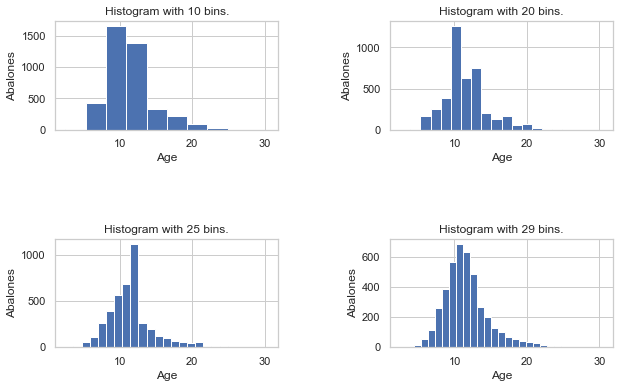

In [327]:
hists_fig = plt.figure(figsize=(10, 6))
hists_fig.subplots_adjust(hspace=1, wspace=0.5)

for i, bins in enumerate([10,20,25,29]):
    target_hist = hists_fig.add_subplot(2, 2, i+1)
    
    target_hist.hist(y['Age'], bins=bins)
    target_hist.set_title('Histogram with %d bins.' % bins)
    target_hist.set_xlabel('Age')
    target_hist.set_ylabel('Abalones')

From the boxplot below we can see that we have noisy target, because of outliers, what may cause a cross validation problems.

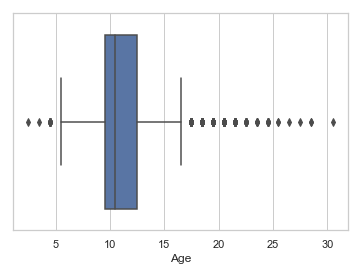

In [329]:
target_boxplot = sns.boxplot(x='Age', data=y[['Age']])

Here we can see, that infant abalones are younger than males and females, whose age don't vary too much.

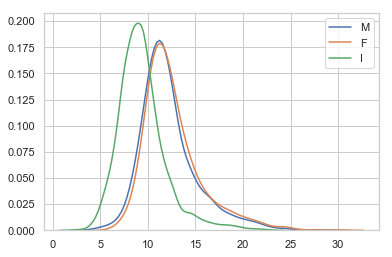

In [330]:
sex_uniques = df['Sex'].unique()

for sex_unique in sex_uniques:
    subset = df[df['Sex']==sex_unique]
    
    sns.kdeplot(subset['Age'], label=sex_unique)
    

Shell weight is the most correlated to target feature.

In [331]:
df.corr()['Age'].sort_values()

Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Age               1.000000
Name: Age, dtype: float64

Here is a table of correlations between features. We can see that there are several high correlated pairs of features. It creates the basis for the further dimensionality reduction.

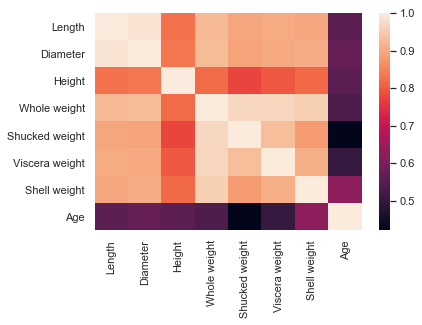

In [332]:
corr = df.corr()
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

***
# Supervised learning

Encoding categorical features with one-hot encoding. In our case there is only one categorical feature - Sex.

In [12]:
features = X.copy()

categorical_col = pd.get_dummies(df['Sex'])

features = pd.concat(
    [
        categorical_col,
        features.drop('Sex', axis=1)
    ], 
    axis=1)
features.head()

,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


Split dataset for train and test subsets. We leave 30% of whole dataset for test subset, because of noisy target.


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    features,
    y,
    test_size=0.3,
    random_state=42
)

Baseline - median of train subset target. 

We will use MAE to evaluate our predictive model, 
instead of RMSE or MSE. The main reason for which 
we make this choice is that the absolute error is 
more robust to outliers (squared distance between
predicted and real values of outlier will increase
error).

In [14]:
baseline = np.median(y)
mae = mean_absolute_error(
    y_test['Age'], 
    np.full((y_test.shape[0]),baseline)
)

print('MAE for baseline model: {}'.format(mae))

MAE for baseline model: 2.325358851674641


## Data normalization

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/Users/dimasik/abalone/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Model choosing


We will choose Random Forest and Gradient Boosting algorithms for the following problem, which are less sensitive to outliers than K-nearest neighbors or SVM.

Random forest is an ensemble algorithm based on many decision trees. Each tree trains and predicts the target value independently of others. Final prediction is the most frequently repeated value for classification problem or the mean for regression. It makes random forest more accurate and less overfitted than single decision tree.

Gradient Boosting is a complex sequential algorithm based on simple decision tree. It builds tree and looks 
for minimum of error function using descent gradient. Gradient Boosting is effective algorithm, which shows high  accuracy in most of machine learning problems.

### Random Forest with default hyperparametrs.

/Users/dimasik/abalone/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dimasik/abalone/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


MAE for Random Forest: 1.616267942583732


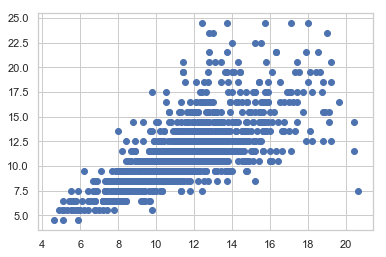

In [37]:
rand_forest_model = RandomForestRegressor()

rand_forest_model.fit(X_train, y_train)

rand_forest_predictions = rand_forest_model.predict(X_test)

rand_forest_mae = mean_absolute_error(y_test.values, rand_forest_predictions)

# sns.kdeplot(y_test['Age'], label='Values')
# sns.kdeplot(rand_forest_predictions, label='Random forest predictions')

plt.scatter(
    rand_forest_predictions,
    y_test['Age']
)

print('MAE for Random Forest: {}'.format(rand_forest_mae))

The distribution of predicted values looks to be nearly the same, but has peak closer to mean value of train subset rather than median.

### Gradient boost model with default hyperparametrs.

MAE for Gradient Boosting Regressor: 1.5401543630585073


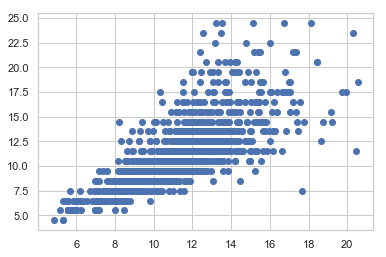

In [36]:
gboost_model = GradientBoostingRegressor()

gboost_model.fit(X_train, y_train['Age'])

gboost_predictions = gboost_model.predict(X_test)

gboost_mae = mean_absolute_error(y_test.values, gboost_predictions)

# sns.kdeplot(y_test['Age'], label='Values')
# sns.kdeplot(gboost_predictions, label='Gboost predictions')

plt.scatter(
    gboost_predictions,
    y_test['Age']
)


print('MAE for Gradient Boosting Regressor: {}'.format(gboost_mae))

Distribution of predicted values by gradient boosting model is less similar to distribution of test subset, but shows higher accuracy than Random Forest.


# Dimensionality reduction

Dimensionality reduction is used when we need to 
make model less complex and increase performance
by reducing its dimensionality. Sometimes data contains
noise or features that don't affect the result, so they 
can be removed. Also dimensionality reduction helps to
visualize the data.

The most common algorithm of dimensionality reduction is
PCA. This technique looks for principal components that best 
differentiate data. PCA examines correlations between features
to reduce the number of dimensions in the dataset.

Another one dimensionality reduction algorithm is t-SNE,
which is mostly used to visualize data. t-SNE heavy 
computation is based on matching distributions. Before 
applying this technique to a high dimensional data 
is recommended to use another dimensionality reduction
algorithms, for ex. PCA. 

/Users/dimasik/abalone/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/dimasik/abalone/venv/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Explained variation per principal component:  [0.69274183 0.15198329]


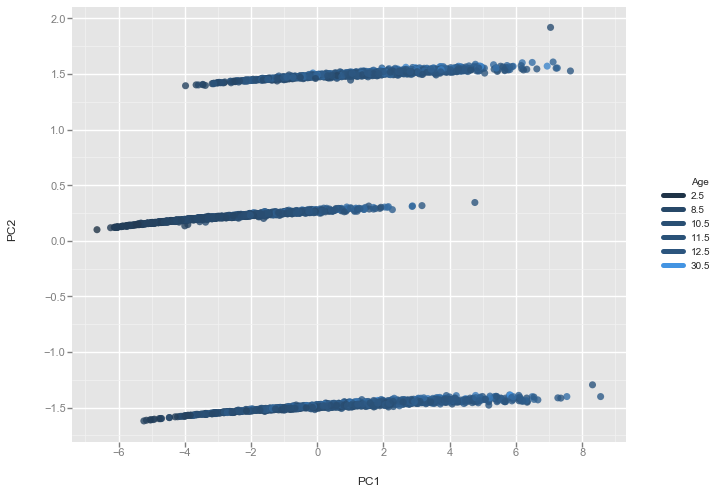

<ggplot: (-9223372036556284819)>

In [343]:
scaled_features = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)

pca_data = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(
    data=pca_data,
    columns=['PC1','PC2']
)

print(
    'Explained variation per principal component: ', 
    pca.explained_variance_ratio_
)

pca_target_df = pd.concat([pca_df, df['Age']], axis=1)

pca_plot = ggplot(
    pca_target_df,
    aes(x='PC1', y='PC2', color='Age')
) + geom_point(size=50,alpha=0.8)
pca_plot

After applying PCA and visualizing it,
we can notice that our dataset divided into 3
groups. From the explained variance ratio
we can see that two principal components
hold 85% of the variation in the entire dataset, what
is quite enough to build model.

In [293]:
tsne = TSNE(
    n_components=2,
    perplexity=40,
    n_iter=300
)

tsne_data = tsne.fit_transform(scaled_features)

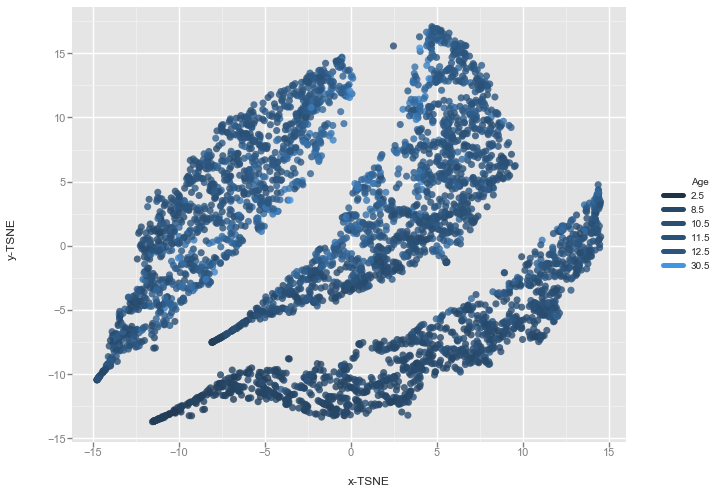

<ggplot: (298664077)>

In [344]:
tsne_df = pd.DataFrame(
    data=tsne_data,
    columns=['x-TSNE','y-TSNE']
)

tsne_target_df = pd.concat(
    [tsne_df,df['Age']],
    axis=1
)

tsne_plot = ggplot(
    tsne_target_df,
    aes(x='x-TSNE', y='y-TSNE', color='Age')
) + geom_point(size=50,alpha=0.8)

tsne_plot

Here we see similar situation as previous -
our data is divided into 3 groups. I assume 
that it is groups divided by Sex feature.


# Hyperparameter selection and crossvalidation

Both of chosen algorithms have its own hyperparameters.
We will use Randomize Search with cross validation
to tune Gradient Boost hyperparameters such as loss function,
number of decision trees, max depth of trees etc.

RandomizedSearchCV randomly choose values from given parameters,
perform cross validationd and finally retun best model.
We will use 5-fold cross validation.

### Tuning hyperparameters for Gradient Boost

In [232]:
n_estimators = [50,100,500,750,1000]

max_depth = [2,3,5,10]

min_samples_leaf = [1,2,3,5,10]

min_samples_split = [2,4,6,10,20]

loss = ['ls', 'lad', 'huber']

max_features = ['auto', 'sqrt', 'log2', None]

grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'loss': loss,
    'max_features': max_features
}

gboost_model_cv = GradientBoostingRegressor(
    random_state=42
)

gboost_random_cv = RandomizedSearchCV(
    estimator=gboost_model_cv,
    param_distributions=grid,
    cv=5,
    n_iter=30,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    return_train_score=True,
    random_state=42
)

gboost_random_cv.fit(X_train, y_train)

gboost_random_cv.best_estimator_

/Users/dimasik/abalone/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=5,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=3, min_samples_split=6,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=42,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Text(0, 0.5, 'MAE')

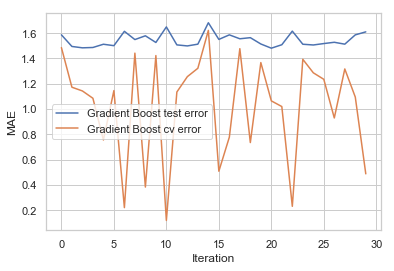

In [346]:
random_search_results = pd.DataFrame(gboost_random_cv.cv_results_)

plt.plot(
    -1*random_search_results['mean_test_score'],
    label='Gradient Boost test error'
)

plt.plot(
    -1*random_search_results['mean_train_score'],
    label='Gradient Boost cv error'
)

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('MAE')

Cross-validation score is not worse than 
score that model achieves on test set.
We can see that sometimes cross validation 
score falls closely to zero, but test scores 
goes up, what means that model overfitts.

We will use Grid Search cross validation
to find a compromise between accuracy and 
overfitting by choosing number of trees.


In [212]:
trees_grid = {
    'n_estimators': [10,25,50,75,100,250,500,750]
}

gb_model = GradientBoostingRegressor(
    loss='huber',
    max_depth=5,
    max_features='auto',
    min_samples_leaf=10,
    min_samples_split=20,
    random_state=42
)

trees_grid_cv = GridSearchCV(
    estimator=gb_model,
    param_grid=trees_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    return_train_score=True
)

trees_grid_cv.fit(X_train, y_train)

/Users/dimasik/abalone/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=5,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min...       subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 25, 50, 75, 100, 250, 500, 750]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

Text(0, 0.5, 'MAE')

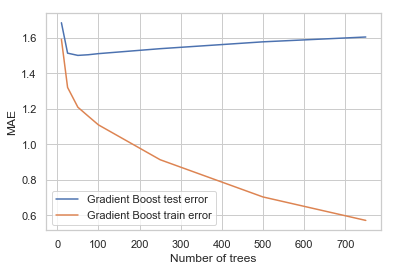

In [347]:
grid_search_results = pd.DataFrame(trees_grid_cv.cv_results_)

plt.plot(
    grid_search_results['param_n_estimators'],
    -1*grid_search_results['mean_test_score'],
    label='Gradient Boost test error'
)

plt.plot(
    grid_search_results['param_n_estimators'],
    -1*grid_search_results['mean_train_score'],
    label='Gradient Boost train error'
)

plt.legend()
plt.xlabel('Number of trees')
plt.ylabel('MAE')


From this experiment we see that 
model is overfitting. The more trees, 
the lower train error, what means that
model fit train data very well, but test
error is growing.

After few times changing Randomized SearchCV 
parameters and Grid Search experiment, tuned
Gradient Boost model is shown below.

In [38]:
tuned_gboost_model = GradientBoostingRegressor(
    loss='huber',
    max_depth=5,
    max_features='auto',
    min_samples_leaf=10,
    min_samples_split=20,
    random_state=42,
    n_estimators=50
)

tuned_gboost_model.fit(X_train, y_train['Age'])

tuned_gboost_predictions = tuned_gboost_model.predict(X_test)

tuned_gboost_mae = mean_absolute_error(
    y_test.values, 
    tuned_gboost_predictions
)

print('MAE for Gradient Boosting Regressor: {}'.format(tuned_gboost_mae))

MAE for Gradient Boosting Regressor: 1.49589934523452


Tuned model shows higher accuracy than
model with default values of hyperparameters.
High peak shows that model predict values 
near to mean.

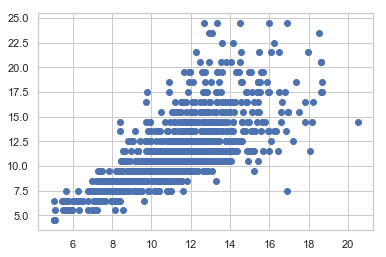

In [40]:
# sns.kdeplot(y_test['Age'], label='Values')
# sns.kdeplot(tuned_gboost_predictions, label='Gboost predictions')

plt.scatter(
    tuned_gboost_predictions,
    y_test['Age']
)